# Analytical and numerical calculation of the order of approximation of a derivative calculated through finite differences (optional).

## 1 – The numerical test of the high-order formula

Implement the finite difference formula given by the first term on the right of Eq (5) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization)  into the program you developed for Exercise 1a and test if you get an approximation to the first derivative with an error that converges to zero like $(\Delta x)^4$.

Compare the 2nd-order and 4th-order error curves. Which error do you get in either case for 128 intervals? For 512 intervals? For 1024 intervals?

## 2 - Precission

Try for more than $10^6$ grid points. What do you see? What happens if you try for a lower or higher floating number? Numpy uses float 64 as default. Instead, use `np.float32` and `np.float128`. Explain the error slopes. 

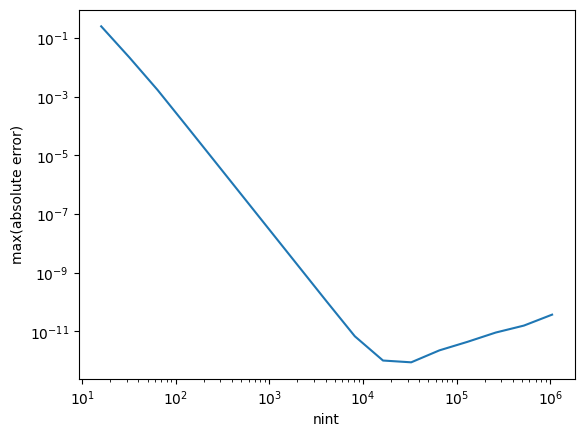

In [6]:
import numpy as np 
from nm_lib import nm_lib as nm
import matplotlib.pyplot as plt 

def new_deriv(xx, hh): 
    return (hh[:-4] - 8*hh[1:-3] + 8*hh[3:-1] - hh[4:])/(12*(xx[1] - xx[0]))

def h(x): 
    return np.cos(np.pi*(x-1)/2)*np.exp(-((x-3)/2.5)**2)

def hp_analytical(x): 

    return -(np.pi/2)*np.sin((np.pi*(x-1)/2))*np.exp(-((x-3)/2.5)**2) + np.cos(np.pi*(x-1)/2)*(-2*((x-3)/2.5)*(1/2.5))*np.exp(-((x-3)/2.5)**2)


nint_list2 = 2**np.arange(4,21)
diff_max = np.zeros(len(nint_list2))

for i in range(len(nint_list2)):


    nump = nint_list2[i] +1 
    x0 = -4.0
    xf = 10.0
    xx = np.arange(nump)/(nump-1.0)*(xf-x0) + x0

    hp_num = new_deriv(xx, h(xx))

    hp_a = hp_analytical(xx)

    diff = np.abs(hp_a[2:-2] - hp_num)
    diff_max[i] = np.max(diff)


plt.plot(nint_list2, diff_max)
plt.xlabel("nint")
plt.ylabel("max(absolute error)")
plt.yscale("log")
plt.xscale("log")


We implemented the first right term of Eq (5) directly, calling the implemented function `new_deriv`. Here we needed to make sure we stayed inside the boundaries, as we need $x_{i-2}, x_{i-1}, x_{i+1}$ and $x_{i+2}$ at the same time. We therefore have to remove the first two and last two points in the analytical solution. 

We see that after $10^4$ number intervals (nint), the maximum absolute error starts increasing again. This is due to the number of floating points not being able to "resolve" the number. The precission is no longer as precise when we have this many intervals.

<span style="color:green">JMS</span>.

<span style="color:blue">Good</span>.

<span style="color:orange">Minor comments: Add some minor comments in def functions, typically the description in functions are as follows</span>.

<span style="color:red"> move new_deriv into deriv_4tho function inside nm_lib</span>.

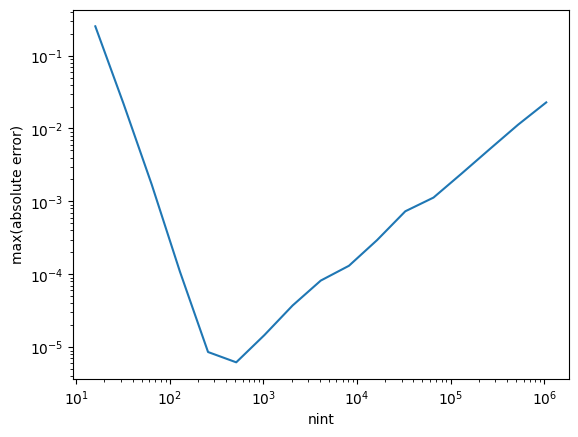

In [7]:

nint_list2 = 2**np.arange(4,21)
diff_max = np.zeros(len(nint_list2))

for i in range(len(nint_list2)):


    nump = nint_list2[i] +1 
    x0 = -4.0
    xf = 10.0
    xx = np.float32(np.arange(nump)/(nump-1.0)*(xf-x0) + x0)

    hp_num = np.float32(new_deriv(xx, h(xx)))

    hp_a = np.float32(hp_analytical(xx))

    diff = np.float32(np.abs(hp_a[2:-2] - hp_num))
    diff_max[i] = np.float32(np.max(diff))


plt.plot(nint_list2, diff_max)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("nint")
plt.ylabel("max(absolute error)")
plt.show()


Using the same method as earlier, we now use a lower floating point number of 32. We now see the maximum absolute error starts to increase again at a smaller number of intervals than for higher floating point number. 

<span style="color:green">JMS</span>.

<span style="color:blue">Good</span>.

<span style="color:orange">Minor comments: Add some minor comments in def functions, typically the description in functions are as follows</span>.
